In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pandas_bokeh

from bokeh.resources import INLINE
import bokeh.io
bokeh.io.output_notebook(INLINE) 

# import figure and gridplot objects
from bokeh.plotting import figure
from bokeh.layouts import gridplot

from bokeh.io import output_file, show

from bokeh.models import FactorRange

from bokeh.transform import dodge

# ColumnDataSource is bokeh's native data structure similar to pandas dataframe. 
from bokeh.models import ColumnDataSource

# To change the color and shape of the markers
from bokeh.transform import factor_cmap, factor_mark

import panel as pn

pn.extension()

Loading BokehJS ...

In [3]:
DATA_DFo = pd.read_csv('AB_NYC_2019.csv')

In [4]:
print(DATA_DFo.columns)
print(DATA_DFo.shape)
print(DATA_DFo.dtypes)

#Look for Null Values
for col in DATA_DFo.columns:
        na_df = DATA_DFo[col].isna()
        print('Number of Nulls in',col,':',na_df[na_df==True].count())

DATA_DF = DATA_DFo.copy()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
(48895, 16)
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtyp

In [5]:
DATA_DF.dropna(inplace=True)
print(DATA_DF.shape)
for col in DATA_DF.columns:
        na_df = DATA_DF[col].isna()
        print('Number of Nulls in',col,':',na_df[na_df==True].count())

(38821, 16)
Number of Nulls in id : 0
Number of Nulls in name : 0
Number of Nulls in host_id : 0
Number of Nulls in host_name : 0
Number of Nulls in neighbourhood_group : 0
Number of Nulls in neighbourhood : 0
Number of Nulls in latitude : 0
Number of Nulls in longitude : 0
Number of Nulls in room_type : 0
Number of Nulls in price : 0
Number of Nulls in minimum_nights : 0
Number of Nulls in number_of_reviews : 0
Number of Nulls in last_review : 0
Number of Nulls in reviews_per_month : 0
Number of Nulls in calculated_host_listings_count : 0
Number of Nulls in availability_365 : 0


In [6]:
Table1 = DATA_DF.groupby(["neighbourhood_group","room_type"], as_index=True).agg({"price":"median","number_of_reviews":"median",'minimum_nights':"median",'availability_365':"median"})
Table1

price  number_of_reviews  minimum_nights  \
neighbourhood_group room_type                                                   
Bronx               Entire home/apt  100.0               19.5               2   
                    Private room      50.0               14.0               2   
                    Shared room       28.0                5.0               1   
Brooklyn            Entire home/apt  144.0               11.0               3   
                    Private room      64.0                8.0               2   
                    Shared room       36.0                7.0               2   
Manhattan           Entire home/apt  182.0                8.0               3   
                    Private room      89.0               10.0               2   
                    Shared room       65.5               12.5               1   
Queens              Entire home/apt  120.0               14.0               2   
                    Private room      59.0               14.0               2   
                    Shared room       36.5                8.0               1   
Staten Island       Entire home/apt  100.0               21.0               2   
                    Private room      50.0               20.0               2   
                    Shared room       30.0                1.0               2   

                                     availability_365  
neighbourhood_group room_type                          
Bronx               Entire home/apt             154.0  
                    Private room                162.0  
                    Shared room                  89.0  
Brooklyn            Entire home/apt              36.0  
                    Private room                 41.0  
                    Shared room                 119.0  
Manhattan           Entire home/apt              40.0  
                    Private room                 39.0  
                    Shared room                  89.0  
Queens              Entire home/apt             106.0  
                    Private room                126.0  
                    Shared room                 193.0  
Staten Island       Entire home/apt             185.5  
                    Private room                284.0  
                    Shared room                  37.0

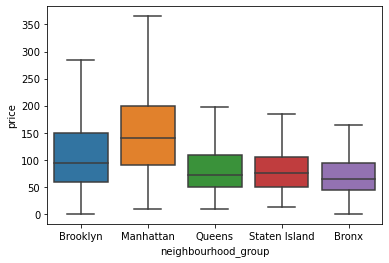

In [7]:
Graph1 = sns.boxplot(x="neighbourhood_group", y="price", data=DATA_DF, showfliers=False)

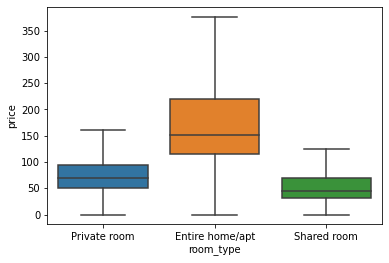

In [8]:
Graph2 = sns.boxplot(x="room_type", y="price", data=DATA_DF, showfliers=False)

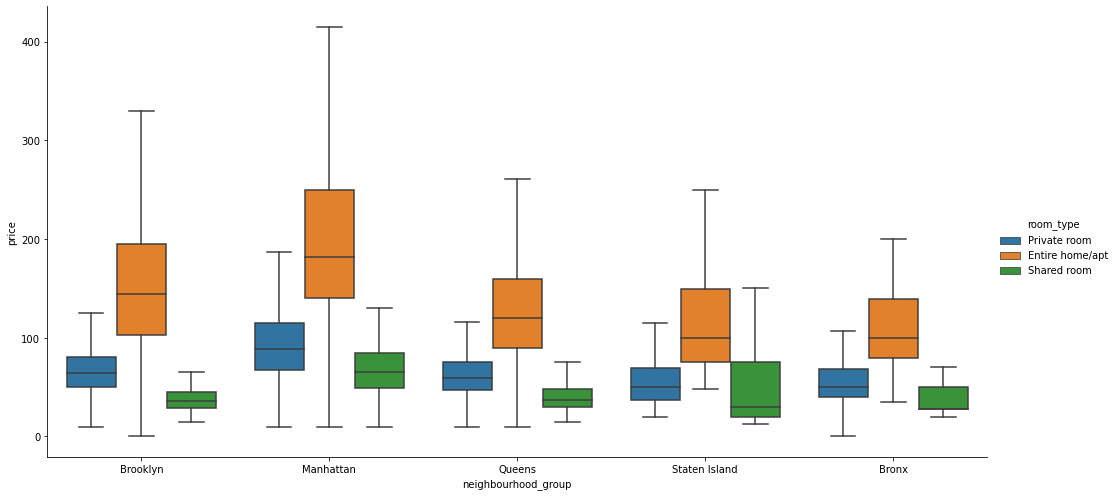

In [9]:
Graph3 = sns.catplot(x="neighbourhood_group", y="price",
                hue="room_type", 
                data=DATA_DF, kind="box",
                height=7, aspect=2, showfliers=False);

In [10]:
Borough = DATA_DF["neighbourhood_group"].copy()
Types   = DATA_DF["room_type"].copy()

DATA_DF = pd.get_dummies(data=DATA_DF, drop_first = False, columns=['neighbourhood_group','room_type'])

DATA_DF.rename(columns={'neighbourhood_group_Bronx': "Bronx", 'neighbourhood_group_Brooklyn': "Brooklyn", 'neighbourhood_group_Queens': "Queens", 'neighbourhood_group_Manhattan': "Manhattan", 'neighbourhood_group_Staten Island': "StatenIsland",}, inplace = True)

DATA_DF.rename(columns={'room_type_Entire home/apt': 'HomeEntire','room_type_Private room': 'RoomPrivate','room_type_Shared room': 'RoomShared'}, inplace = True)

DATA_DF["Borough"] = Borough 
DATA_DF["Types"] = Types

In [11]:
DATA_DF.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'StatenIsland', 'HomeEntire', 'RoomPrivate', 'RoomShared', 'Borough',
       'Types'],
      dtype='object')

In [12]:
#First Scatter Visualization
def Bokeh_Reviews():

    bkPlot_L = DATA_DF.plot_bokeh.scatter('reviews_per_month', 'price', 
                                     figsize=(450,320),
                                     category='Borough', 
                                     colormap='Viridis', 
                                     line_color='gray', line_width=1,
                                     fontsize_legend=8, 
                                     #legend=False,   
                                     legend="top_right",                                     
                                     #size='minimum_nights', 
                                     alpha=.5)

    bkPlot_L.y_range.start = 0
    bkPlot_L.y_range.end = 40
    bkPlot_L.grid.grid_line_color = None
    bkPlot_L.axis.minor_tick_line_color = None
    bkPlot_L.legend.padding = None
    bkPlot_L.legend.spacing = None
 
    #return bkPlot_L   

def Bokeh_MinNights():

    bkPlot_R = DATA_DF.plot_bokeh.scatter('minimum_nights', 'price', 
                                     figsize=(450,320),
                                     category='Borough', 
                                     colormap='Viridis', 
                                     line_color='gray', line_width=1,
                                     fontsize_legend=8, 
                                     #legend=False,   
                                     legend="top_right",                                     
                                     #size='minimum_nights', 
                                     alpha=.5)

    bkPlot_R.y_range.start = 0
    bkPlot_R.y_range.end = 40
    bkPlot_R.grid.grid_line_color = None
    bkPlot_R.axis.minor_tick_line_color = None
    bkPlot_R.legend.padding = None
    bkPlot_R.legend.spacing = None
 
    #return bkPlot_R  


#pn.Row(pn.Column(Bokeh_Reviews),pn.Column(Bokeh_MinNights))


#pn.Column(Bokeh_Reviews,Bokeh_MinNights)

airbnbGS = pn.GridSpec(sizing_mode='stretch_both', width=50, height=50)

# Specify what each row and column will contain

# This will create two columns [1,0] and [1,1] in the 2nd row each column occupying plot from a different library
airbnbGS[0,0] = pn.Column(Bokeh_Reviews, margin=0, align="center")
airbnbGS[0,1] = pn.Column(Bokeh_MinNights, margin=0, align="center")

In [13]:
#Second Scatter Visualization
def Bokeh_Reviews2():

    bkPlot_L = DATA_DF.plot_bokeh.scatter('reviews_per_month', 'price', 
                                     figsize=(450,320),
                                     category='Types', 
                                     colormap='Viridis', 
                                     line_color='gray', line_width=1,
                                     fontsize_legend=8, 
                                     #legend=False,   
                                     legend="top_right",                                     
                                     #size='minimum_nights', 
                                     alpha=.5)

    bkPlot_L.y_range.start = 0
    bkPlot_L.y_range.end = 40
    bkPlot_L.grid.grid_line_color = None
    bkPlot_L.axis.minor_tick_line_color = None
    bkPlot_L.legend.padding = None
    bkPlot_L.legend.spacing = None
 
    #return bkPlot_L   

def Bokeh_MinNights2():

    bkPlot_R = DATA_DF.plot_bokeh.scatter('minimum_nights', 'price', 
                                     figsize=(450,320),
                                     category='Types', 
                                     colormap='Viridis', 
                                     line_color='gray', line_width=1,
                                     fontsize_legend=8, 
                                     #legend=False,   
                                     legend="top_right",                                     
                                     #size='minimum_nights', 
                                     alpha=.5)

    bkPlot_R.y_range.start = 0
    bkPlot_R.y_range.end = 40
    bkPlot_R.grid.grid_line_color = None
    bkPlot_R.axis.minor_tick_line_color = None
    bkPlot_R.legend.padding = None
    bkPlot_R.legend.spacing = None
 
    #return bkPlot_R  


#pn.Row(pn.Column(Bokeh_Reviews),pn.Column(Bokeh_MinNights))


#pn.Column(Bokeh_Reviews,Bokeh_MinNights)

airbnbGS2 = pn.GridSpec(sizing_mode='stretch_both', width=50, height=50)

# Specify what each row and column will contain

# This will create two columns [1,0] and [1,1] in the 2nd row each column occupying plot from a different library
airbnbGS2[0,0] = pn.Column(Bokeh_Reviews2, margin=0, align="center")
airbnbGS2[0,1] = pn.Column(Bokeh_MinNights2, margin=0, align="center")

In [14]:
y = DATA_DF["price"]

#We eliminate SharedRoom and Staten Island as regressors, to avoid multiculinearity with the intercept

X  = DATA_DF[['minimum_nights', 'number_of_reviews','HomeEntire', 'RoomPrivate', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens']]

price_ols = LinearRegression()    #It will include an intercept unless price_ols = LinearRegression(fit_intercept=False)
price_ols.fit(X,y)

print(pd.DataFrame({'Predictor': X.columns,'coefficient':price_ols.coef_}))
print('           Intercept   ',price_ols.intercept_)

           Predictor  coefficient
0     minimum_nights    -0.045990
1  number_of_reviews    -0.109557
2         HomeEntire   128.464390
3        RoomPrivate    23.854179
4              Bronx     3.081002
5           Brooklyn    28.892922
6          Manhattan    76.643198
7             Queens    16.116832
           Intercept    20.701638098813376


In [15]:
X1  = DATA_DF[['minimum_nights', 'number_of_reviews','HomeEntire', 'RoomPrivate', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens']]
X1["intercept"] = np.ones(len(y))

price_ols = LinearRegression(fit_intercept=False)
price_ols.fit(X1,y)

#Notice there is no intercept, that is why we can do 'HomeEntire', 'RoomPrivate', 'RoomShared'... SUM=1

print(pd.DataFrame({'Predictor': X1.columns,'coefficient':price_ols.coef_}))

           Predictor  coefficient
0     minimum_nights    -0.045990
1  number_of_reviews    -0.109557
2         HomeEntire   128.464390
3        RoomPrivate    23.854179
4              Bronx     3.081002
5           Brooklyn    28.892922
6          Manhattan    76.643198
7             Queens    16.116832
8          intercept    20.701638


<ipython-input-15-23fd204151f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1["intercept"] = np.ones(len(y))


In [16]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
price_ols1  = sm.OLS(y, X2)
price_ols1i = price_ols1.fit()
print(price_ols1i.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     545.3
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        17:33:03   Log-Likelihood:            -2.5811e+05
No. Observations:               38821   AIC:                         5.162e+05
Df Residuals:                   38812   BIC:                         5.163e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                20.7016     12.34